## Відстань Жаккара
Відстань Жаккара вимірює відмінність між скінченними множинами. Може набувати значення від 0 до 1, де 0 - найменша відстань і множини ідентичні, а 1 - найбільша відстань і множини абсолютно різні.
$$ d_{J}(A,B)=\frac{|A \cup B|-|A \cap B|}{|A\cup B|} $$

### Приклад

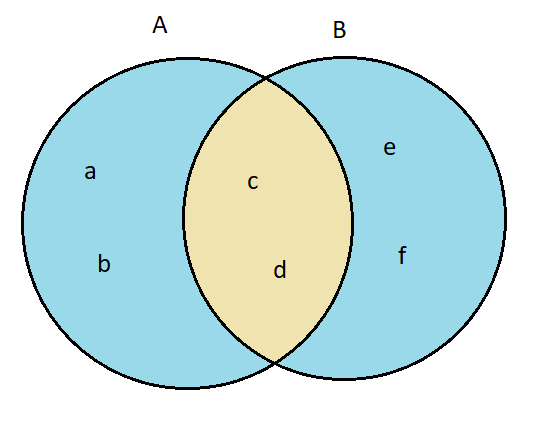
$ A = (a, b, c, d) $

$ B = (c, d, e, f) $

$ A \cup B = (a, b, c, d, e, f) $

$ A \cap B = (c, d) $

$ |A \cup B| = 6 $

$ |A \cap B| = 2 $
$$ d_{J}(A,B) = \frac{|A \cup B|-|A \cap B|}{|A\cup B|} = \frac{6-2}{6} = 0.6667 $$

### Імпорт

In [1]:
import numpy as np
from scipy.spatial.distance import jaccard
import seaborn as sns;
import matplotlib as plt

### Дані

In [2]:
texts = [
    'What is the step by step guide to invest in share market in india',
    'What is the step by step guide to invest in share market',
    'How can I increase the speed of my internet connection while using a VPN',
    'How can Internet speed be increased by hacking through DNS',
    'Which one dissolve in water quikly sugar salt methane and carbon di oxide',
    'Which fish would survive in salt water'
]

### Підготовка даних
- Сформуємо сет слів(text_set) для кожного речення та хеш(onehot_texts) для кожного речення у вигляді one-hot кодування. 
- Ключі до one-hot кодування в масиві words. 
- Підхід з набором сетів зручніший для розуміння. Підхід з кодуванням використовується в бібліотеці SciPy.

In [3]:
words = []
text_set = []
for text in texts:
    splited_text = text.lower().split(' ')
    words += splited_text
    text_set.append(set(splited_text))
words = list(set(words))
onehot_texts = []
for txt in text_set:
    onehot = [False for i in range(len(words))]
    for word in txt:
        onehot[words.index(word)] = True
    onehot_texts.append(onehot)

In [4]:
print(texts[0])
print(text_set[0])
print(onehot_texts[0])

What is the step by step guide to invest in share market in india
{'to', 'step', 'what', 'by', 'in', 'the', 'guide', 'india', 'is', 'market', 'invest', 'share'}
[False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, True, False]


### Функція для обрахунку відстані Жаккарда, що працює з сетами слів
Реалізуємо наступну формулу:
$$ d_{J}(A,B)=\frac{|(A \setminus B) \cup (B \setminus A)|}{|A\cup B|}=\frac{|A \cup B|-|A \cap B|}{|A\cup B|} $$
Ця формула дає аналогічний результат, що і формула в шапці

In [5]:
def jaccard_set(a,b):
    return len(list(a-b) + list(b-a))/len(set(list(a)+list(b)))

Порахуємо матрицю подібності

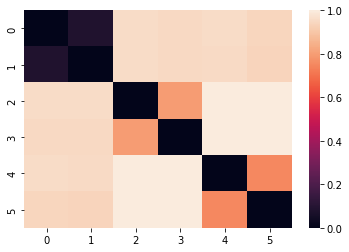

In [6]:
marks = np.zeros((len(texts), len(texts)))
for i in range(len(text_set)):
    for j in range(len(text_set)):
        marks[i,j] = jaccard_set(text_set[i], text_set[j])
ax = sns.heatmap(marks)

З матриці подібності видно, що відстань між реченнями з більшою кількістю спільних слів менша.

### Функція для обрахунку відстані Жаккарда, що працює з one-hot кодуванням
По подібному принципу реалізована функція в бібліотеці SciPy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.jaccard.html

In [7]:
def jaccard_onehot(a,b):
    aa = np.array(a) == True
    bb = np.array(b) == True
    return (np.logical_or(aa,bb).sum()-np.logical_and(aa,bb).sum())/np.logical_or(aa,bb).sum()

Порахуємо матрицю подібності

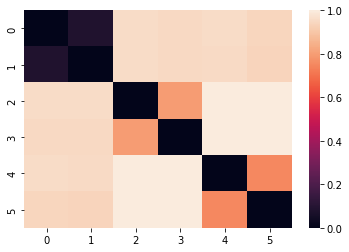

In [8]:
marks = np.zeros((len(texts), len(texts)))
for i in range(len(onehot_texts)):
    for j in range(len(onehot_texts)):
        marks[i,j] = jaccard_onehot(onehot_texts[i], onehot_texts[j])
ax = sns.heatmap(marks)

З графіку видно, що результат аналогічний, однак наш набір даних при такому кодуванні може займати менше пам'яті

### Функція обрахунку відстані Жаккарда з бібліотеки SciPy
Порахуємо матрицю подібності

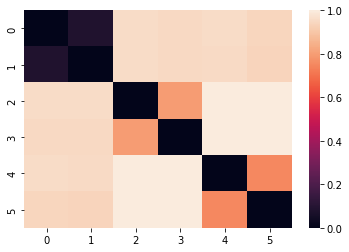

In [9]:
marks = np.zeros((len(texts), len(texts)))
for i in range(len(onehot_texts)):
    for j in range(len(onehot_texts)):
        marks[i,j] = jaccard(onehot_texts[i], onehot_texts[j])
ax = sns.heatmap(marks)

Варто зазначити, що функція з бібліотеки SciPy може приймати не тільки значення в (0,1). Давайте подивимось результати роботи фунції при інших даних.

In [10]:
print(jaccard([1,1,0],[1,0,0]))
print(jaccard([1,1,0],[1,1,0]))
print(jaccard([1,1,0],[1,2,0]))
print(jaccard([1,2,0],[1,2,0]))

0.5
0.0
0.5
0.0


При двох порожніх масивах відстань буде 0.

In [11]:
print(jaccard([],[]))

0
